# Exercise Set: Descriptives and comparing groups

### Estimated Time: 45 minutes

In this exercise, you will:
- Use descriptive statistics to create convenient sample descriptions (table 1)
- Compare means and proportions between groups
- Apply your analyses to the Framingham dataset

# Prepare

Load the required packages (numpy, pandas, scipy.stats, matplotlib, seaborn, and tableone)

In [ ]:
# If needed:
!pip install tableone

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import tableone

Mount your Google Drive folder to the Colab environment

In [ ]:
# Make Google Drive available to the script
from google.colab import drive
drive.mount('/content/drive')

## 1. Descriptives

Load the Framingham dataset

In [ ]:
frame = pd.read_csv('drive/MyDrive/Colab Notebooks/Intro to Python for Epidemiologists/Data/frmgham2.csv')

Create a 'table 1' that has information on the sex, age, and education level. Make sure age is reported with mean and SD instead of as separate counts for each age level; you can manipulate this using the `categorical` and `continuous` parameters in the `TableOne` function.

In [51]:
tableone.TableOne(data = frame, categorical = ['SEX','educ'], continuous = ['AGE'])

Missing      Overall
n                                  11627
SEX, n (%)     1             5022 (43.2)
               2             6605 (56.8)
AGE, mean (SD)            0   54.8 (9.6)
educ, n (%)    1.0           4690 (40.3)
               2.0           3410 (29.3)
               3.0           1885 (16.2)
               4.0           1347 (11.6)
               None            295 (2.5)

## 2. Comparing means in Framingham heart study

Use an independent-samples t-test to compare systolic and diastolic blood pressure **at the first observation for each person** between men and women. Start by producing appropriate tables and plots showing the means and/or distributions in each sex. SEX is coded 1 (men) and 2 (women). Hint: select the first observation for each participant by using `.groupby(RANDID)` and then using the method `.first()` on each group.

In [31]:
first_obs = frame.groupby('RANDID').first()

In [32]:
# Create table with outcomes
tableone.TableOne(data = first_obs, columns = ['SYSBP','DIABP'], groupby = 'SEX')

Grouped by SEX                                          
                         Missing       Overall             1             2
n                                         4434          1944          2490
SYSBP, mean (SD)               0  132.9 (22.4)  131.7 (19.4)  133.8 (24.5)
DIABP, mean (SD)               0   83.1 (12.1)   83.7 (11.4)   82.6 (12.5)

[Text(0.5, 1.0, 'Diastolic BP')]

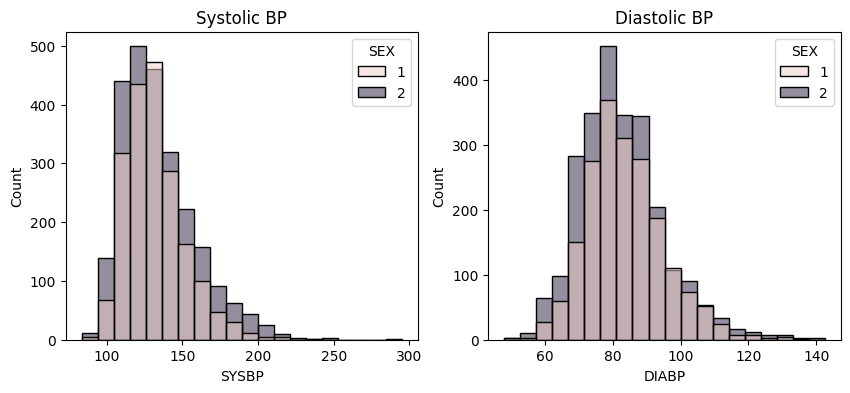

In [33]:
# Create figure containing both outcomes
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = [10,4])
# Systolic blood pressure
sns.histplot(data = first_obs, x = 'SYSBP', hue = 'SEX', bins = 20, ax = ax[0])
ax[0].set(title = 'Systolic BP')
# Diastolic blood pressure
sns.histplot(data = first_obs, x = 'DIABP', hue = 'SEX', bins = 20, ax = ax[1])
ax[1].set(title = 'Diastolic BP')

In [34]:
# T-tests
sysM = first_obs.loc[first_obs['SEX']==1, 'SYSBP']
sysW = first_obs.loc[first_obs['SEX']==2, 'SYSBP']
ttest_result_sys = stats.ttest_ind(sysM, sysW)
print('t(%i) = %.2f, p = %.4f'%(ttest_result_sys.df, ttest_result_sys.statistic, ttest_result_sys.pvalue))

t(4432) = -3.08, p = 0.0021


An independent-samples t-test showed that there was a significant difference in systolic blood pressure between men (M = 131.7, SD = 19.4) and women (M = 133.8, SD = 24.5), t(4432) = -3.08, p = 0.002.

In [35]:
# T-tests
diaM = first_obs.loc[first_obs['SEX']==1, 'DIABP']
diaW = first_obs.loc[first_obs['SEX']==2, 'DIABP']
ttest_result_dia = stats.ttest_ind(diaM, diaW)
print('t(%i) = %.2f, p = %.4f'%(ttest_result_dia.df, ttest_result_dia.statistic, ttest_result_dia.pvalue))

t(4432) = 3.05, p = 0.0023


An independent-samples t-test showed that there was a significant difference in diastolic blood pressure between men (M = 83.7, SD = 11.4) and women (M = 82.6, SD = 12.5), t(4432) = 3.05, p = 0.002.

## Comparing proportions

Use a chi-square test to compare the prevalence in coronary heart disease (`PREVCHD`) between men and women of 60 years or older.

In [44]:
frame60plus = frame.loc[frame['AGE']>=60,:]

In [49]:
ctab = pd.crosstab(frame60plus["SEX"], frame60plus["PREVCHD"])
ctab

PREVCHD,0,1
SEX,,
1,1285,292
2,1940,254


In [50]:
# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(ctab)
print(f"Chi2: {chi2:.2f}, dof: {dof:.0f}, p-value: {p:.4f}")

Chi2: 35.12, dof: 1, p-value: 0.0000


A chi-square test of independence showed a significant association between sex and coronary heart disease in participants 60 or older, $\chi^{2}$(1) = 35.12, p < 0.001.